In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# TITLE_SIZE = 20
AX_TITLE_SIZE = 16
LABEL_SIZE = 14

In [3]:
params = {
    'text.usetex' : True,
    'font.size' : AX_TITLE_SIZE,
    'font.family' : 'lmodern',
#     'text.latex.unicode': True,
}
plt.rcParams.update(params) 

In [4]:
def get_data(dist, test, small, LOOCV):
    file_name = dist
    if small:
        file_name += '_small'
    file_name += '_test' if test else '_train'
    if LOOCV:
        file_name += '_LOOCV'
    
    return np.loadtxt(r'../results/' + file_name + '.txt', delimiter=',', skiprows=1)

## Question A

In [5]:
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train = get_data('euclidian', test=False, small=True, LOOCV=False)

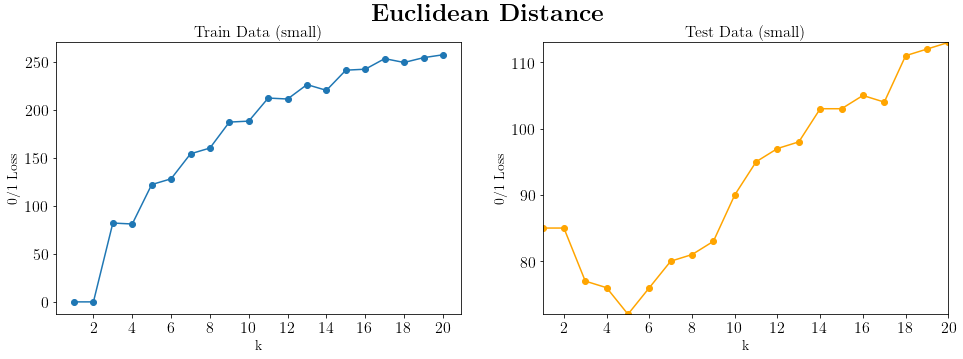

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title('Train Data (small)', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train[:,1])+1, 2)])
ax1.plot(eucl_train[:,1], eucl_train[:,0], marker='o')

ax2.set_title('Test Data (small)', fontsize=AX_TITLE_SIZE)
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')
plt.autoscale(tight=True)

# fig.savefig(
#     r'../figures/QA.png',
#     bbox_size='tight',
#     dpi=350,
#     transparent=True,
#     pad_inches=0
# )

## Question B

In [7]:
eucl_train_LOOCV = get_data('euclidian', test=False, small=True, LOOCV=True)
eucl_test = get_data('euclidian', test=True, small=True, LOOCV=False)
eucl_train_LOOCV_risk = eucl_train_LOOCV[:, 0]/2999

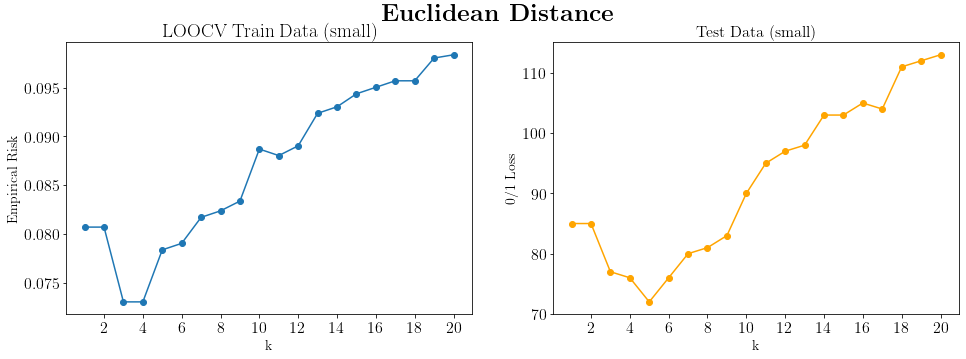

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle(r'\Huge{\textbf{Euclidean Distance}}')

ax1.set_title(r'LOOCV Train Data (small)')
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
ax1.plot(eucl_train_LOOCV[:,1], eucl_train_LOOCV_risk, marker='o')

ax2.set_title('Test Data (small)', fontsize=AX_TITLE_SIZE)
ax2.set_xlabel('k', fontsize=LABEL_SIZE)
ax2.set_ylabel('0/1 Loss', fontsize=LABEL_SIZE)
ax2.set_xticks([x for x in range(0, len(eucl_test[:,1])+1, 2)])
ax2.plot(eucl_test[:,1], eucl_test[:,0], marker='o', color='orange')


# fig.savefig(
#     r'../figures/QB.png',
#     bbox_size='tight',
#     dpi=350,
#     transparent=True,
#     pad_inches=0
# )

## Question C

In [9]:
min_train_LOOCV = get_data('minkowski', test=False, small=True, LOOCV=True)
min_test = get_data('minkowski', test=True, small=True, LOOCV=False)
min_train_LOOCV_risk = min_train_LOOCV[:, 0]/2999

In [10]:
min_train_LOOCV[np.where(min_train_LOOCV[:, 2] == 4)]

array([[220.,   1.,   4.],
       [220.,   2.,   4.],
       [196.,   3.,   4.],
       [201.,   4.,   4.],
       [208.,   5.,   4.],
       [222.,   6.,   4.],
       [230.,   7.,   4.],
       [226.,   8.,   4.],
       [227.,   9.,   4.],
       [231.,  10.,   4.],
       [233.,  11.,   4.],
       [247.,  12.,   4.],
       [248.,  13.,   4.],
       [242.,  14.,   4.],
       [265.,  15.,   4.],
       [259.,  16.,   4.],
       [265.,  17.,   4.],
       [263.,  18.,   4.],
       [276.,  19.,   4.],
       [275.,  20.,   4.]])

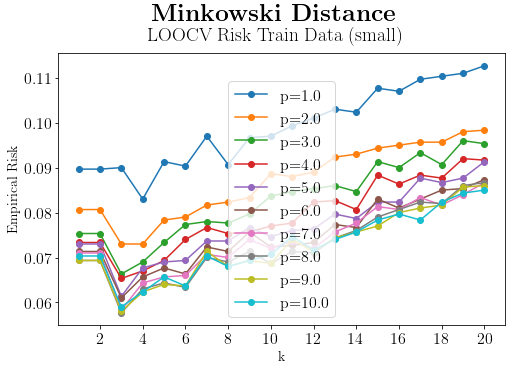

In [24]:
fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
# fig.suptitle('Minkowski Distance\nLOOCV Train Data', fontsize=TITLE_SIZE)
# fig.suptitle(r"""\Huge{Minkowski Distance} \newline  \large{Small subtitle !}""", ha='center')
fig.suptitle(
    r"\Huge{\textbf{Minkowski Distance}}" "\n" r"LOOCV Risk Train Data (small)",
    y=1.01
)

# ax1.set_title('LOOCV Train Data', fontsize=AX_TITLE_SIZE)
ax1.set_xlabel('k', fontsize=LABEL_SIZE)
ax1.set_ylabel('Empirical Risk', fontsize=LABEL_SIZE)
ax1.set_xticks([x for x in range(0, len(eucl_train_LOOCV[:,1])+1, 2)])
for p in np.sort(np.unique(min_train_LOOCV[:, 2])):
    p_results = np.where(min_train_LOOCV[:, 2] == p)
    ax1.plot(
        min_train_LOOCV[p_results][:, 1],
        min_train_LOOCV_risk[p_results],
        marker='o',
        label=f'p={p}'
    )

# ax1.set_yscale('log')    
ax1.legend()

# fig.savefig(
#     r'../figures/QB.png',
#     bbox_size='tight',
#     dpi=350,
#     transparent=True,
#     pad_inches=0
# )